In [23]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [29]:
def read_data_from_subjects():

    

    files = os.listdir('../data/subjects')

    return files

In [31]:
files = read_data_from_subjects()
files

['subject15_1.csv',
 'subject10_2.csv',
 'subject11_1.csv',
 'subject13_1.csv',
 'subject2_1.csv',
 'subject8_2.csv',
 'subject3_2.csv',
 'subject9_2.csv',
 'subject5_2.csv',
 'subject4_2.csv',
 'subject5_1.csv',
 'subject14_1.csv',
 'subject6_2.csv',
 'subject11_2.csv',
 'subject4_1.csv',
 'subject7_1.csv',
 'subject15_2.csv',
 'subject1_2.csv',
 'subject13_2.csv',
 'subject12_1.csv',
 'subject9_1.csv',
 'subject1_1.csv',
 'subject8_1.csv',
 'subject3_1.csv',
 'subject6_1.csv',
 'subject10_1.csv',
 'subject2_2.csv',
 'subject7_2.csv',
 'subject14_2.csv',
 'subject12_2.csv']

In [10]:
optimal_path = pd.read_csv('../data/trajectories/optimal_path.csv', delimiter=";").to_numpy()
optimal_heading = pd.read_csv('../data/trajectories/optimal_heading.csv', delimiter=";").to_numpy()

In [6]:
optimal_path.shape[0] == optimal_heading.shape[0]

True

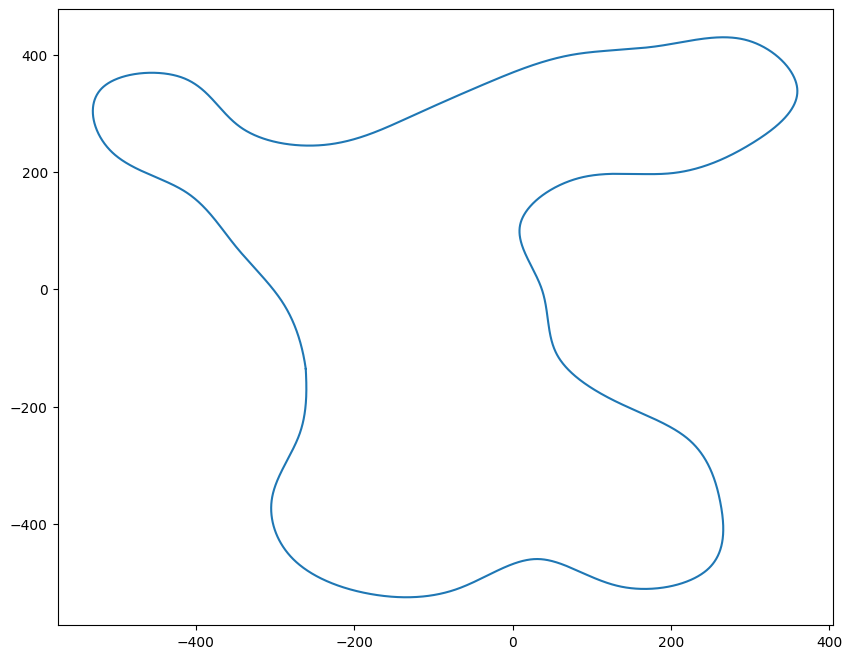

In [12]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))
ax = sns.lineplot(x=optimal_path[:,0], y=optimal_path[:,1], sort=False)

In [14]:
sample_data = pd.read_csv('../data/subject3_1.csv', delimiter=";")

In [15]:
sample_data.head(5)

,Timestamp,Lap_Number,Position.x.,Position.y.,Position.z.,Orientation.x.,Orientation.y.,Orientation.z.,Path_Deviation,Estimated_Path_Center.x.,Estimated_Path_Center.y.,Estimated_Path_Center.z.,Gaze_Location.x.,Gaze_Location.y.,Gaze_Location.z.,Subject
0,1681827797703,0,-255.4,347.2259,-182.4447,0.155342,0.0,0.0,1.8052,-253.6159,243.8401,-182.1695,-292.2738,357.403943,247.076529,3
1,1681827797720,0,-255.4,347.2675,-182.2537,0.223266,0.0,0.0,1.7761,-253.6447,243.8605,-181.9830,-273.2335,354.166250,168.754000,3
2,1681827797736,0,-255.4,347.3056,-182.0298,0.302043,0.0,0.0,1.7419,-253.6784,243.8844,-181.7643,-273.2335,354.166250,168.754000,3
3,1681827797753,0,-255.4,347.3404,-181.7739,0.390675,0.0,0.0,1.7029,-253.7170,243.9149,-181.5143,-273.2335,354.166250,168.754000,3
4,1681827797770,0,-255.4,347.3720,-181.4870,0.488227,0.0,0.0,1.6592,-253.7602,243.9506,-181.2341,-273.2335,354.166250,168.754000,3


In [17]:
sample_path = sample_data.iloc[:,[2, 4]].to_numpy()

<Axes: >

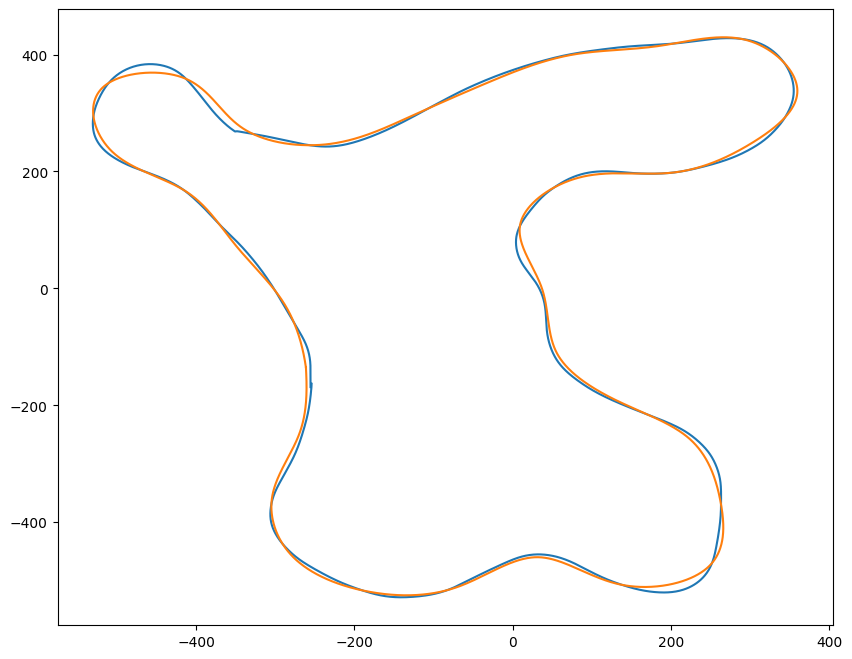

In [22]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.lineplot(x=sample_path[:,0], y=sample_path[:,1], sort=False)
sns.lineplot(x=optimal_path[:,0], y=optimal_path[:,1], sort=False)


<Axes: >

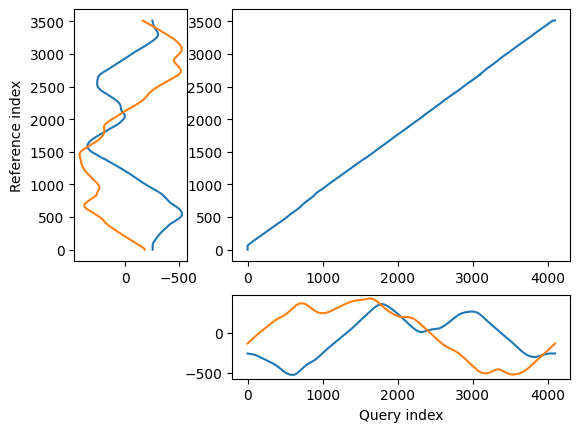

In [21]:
from dtw import *

timewarp = dtw(optimal_path, sample_path, keep_internals=True)
timewarp.plot(type="threeway")

## List of parameters and their meanings


| Symbol | Name | Description | 
| --- | --- | --- |
| $t$ | Timestamp | Timestamp for the flied trajectory |
| $\mathbf{x}$ | Position.x./y./z. | Position of the drone |
| $\theta$ | Orientation.x./y./z. | Orientation of the drone |
| $P$ | Collision\_Target | Point for the collision |
| $\Delta$ | Path\_Deviation | Deviation from the path |
| $p$ | gaze\_point\_3d\_y | Point of gaze in screen coordinates |